<a href="https://colab.research.google.com/github/HILALOZTEMEL/PyTorch/blob/main/12_Convolutional_Neural_Networks(AlexNet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

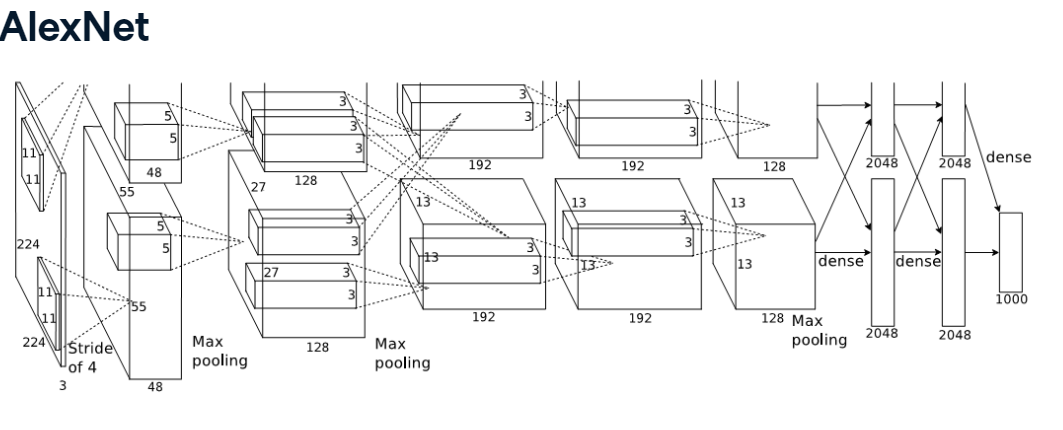

Alex net mimamrisini tam olarak incelersek CNN 'in tam olarak ne olduğunu görebiliriz.Çoklu evrişim içeren bir sinir ağıdır.Evrişim katmanı-> havuzlama katmanı -> ortalam havuz katmanı -> 1000 farklı sınıfta sınıflandıran 3 tam bağlantı katmana sahiptir 

In [ ]:
import torch.nn as nn

class AlexNet(nn.Module):#alexNetten miras alan sınıf

  def __init__(self,num_classes=1000):
    super(AlexNet,self).__init__()
    self.conv1=nn.Conv2d(3,64,kernel_size=11,stride=4,padding=2)
    self.relu=nn.ReLU(inplace=True)
    self.maxpool=nn.MaxPool2d(kernel_size=3,stride=2)
    self.conv2=nn.Conv2d(64,192,kernel_size=5,padding=2)
    self.conv3=nn.Conv2d(192,384,kernel_size=3,padding=1)
    self.conv4=nn.Conv2d(384,256,kernel_size=3,padding=1)
    self.conv5=nn.Conv2d(256,256,kernel_size=3,padding=1)
    self.avgpool=nn.AdaptiveAvgPool2d((6,6))
    self.fc1=nn.Linear(256*6*6,4096)
    self.fc2=nn.Linear(4096,4096)
    self.fc3=nn.Linear(4096,num_classes)
  def forward(self,x):
    x=self.relu(self.conv1(x)) 
    x=self.maxpool(x)
    x=self.relu(self.conv2(x))
    x=self.maxpool(x)
    x=self.relu(self.conv3(x))
    x=self.relu(self.conv5(x))
    x=self.maxpool(x)
    x=self.avgpool(x)
    x=x.view(x.size(0),256*6*6)
    x=self.relu(self.fc1(x))
    x=self.relu(self.fc2(x))
    return self.fc3(x)

net=AlexNet()

